<a href="https://colab.research.google.com/github/MastersMasterM/Digit-Recognizer/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using kaggle API to download data

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c digit-recognizer

mkdir: cannot create directory ‘/root/.kaggle’: File exists
digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

# Splitting X & Y

In [ ]:
X = df.iloc[:,1:]
X = X/255.0
y = df.iloc[:,0:1]

# Plotting an example

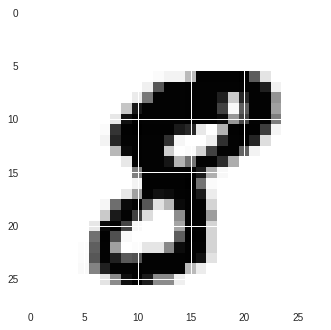

In [ ]:
ex_img = np.array(X.iloc[10,:].values)
ex_img = ex_img.reshape((28,28))
plt.imshow(ex_img)

# Reshaping

In order to be able to use Convolutional layer in keras we have to adjust the dimensition

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
X = X.values.reshape(-1,28,28,1)

# Creating Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
model.compile('rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training model

In [ ]:
history = model.fit(X,y,validation_split=0.2, batch_size=20, epochs=4)

Epoch 1/4
1680/1680 [==============================] - 45s 26ms/step - loss: 0.2199 - accuracy: 0.9311 - val_loss: 0.0808 - val_accuracy: 0.9751
Epoch 2/4
1680/1680 [==============================] - 41s 25ms/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0610 - val_accuracy: 0.9810
Epoch 3/4
1680/1680 [==============================] - 34s 20ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0629 - val_accuracy: 0.9794
Epoch 4/4
1680/1680 [==============================] - 35s 21ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0488 - val_accuracy: 0.9874


# Importing Test dataset

In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Reshaping test data

In [ ]:
t = test.iloc[:,:]/255.0
t = t.values.reshape(-1,28,28,1)

# Predicting the result

In [ ]:
y_pred = model.predict(t)

875/875 [==============================] - 9s 10ms/step


# Choosing The Number with the highest probability

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

# Importing Submission Sample

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


# Replacing Predicted Result

In [ ]:
sub['Label'] = y_pred

# Export the result to csv format

In [ ]:
sub.to_csv('last.csv',index=False)

# Submitting the result

In [ ]:
! kaggle competitions submit -c digit-recognizer -f last.csv -m "first try"

100% 208k/208k [00:01<00:00, 129kB/s]
Successfully submitted to Digit Recognizer